#### The routine EDA has already been done by other guys. Let' do something different. 

#### Since EDA revolving around alcohol consumption is already done let's think about other features.

### *Let's dig in! Give me a thumbs up if you liked it and I'm open to suggestions!*

### Regular Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



%matplotlib inline 

In [2]:
math_data = pd.read_csv("../input/student-mat.csv")
por_data = pd.read_csv("../input/student-por.csv")

math_data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
math_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
por_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Basic feature engineering. 

Before proceeding any further, let's create some new features. 

#### Is the student alcoholic?


From basic analysis I found that, if Weekly consumption is high then in most of the cases the daily consumption is also high. 
Hence in deciding if a student is highly alchololic I'm only considering weekly alcholol comsumption.

In [6]:
def is_alchololic(dataframe):
    if(dataframe['Walc'] >= 3):
        return(True)
    else:
        return(False)

In [7]:
math_data['is_alchololic'] = math_data.apply(lambda row: is_alchololic(row), axis = 1)

por_data['is_alchololic'] = por_data.apply(lambda row: is_alchololic(row), axis = 1)

#### Regarding education. 

In [8]:
def grade_average(dataframe):
    return((dataframe['G1']+dataframe['G2']+dataframe['G3'])/3 )
    

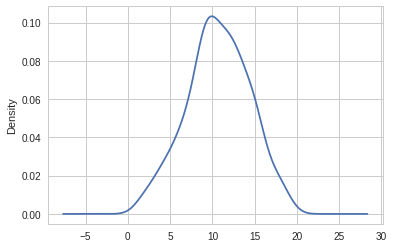

In [9]:
math_data['average_grade'] = math_data.apply(lambda row: grade_average(row), axis = 1)
math_data['average_grade'].plot(kind = "density")

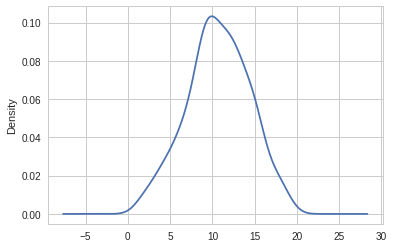

In [10]:
por_data['average_grade'] = math_data.apply(lambda row: grade_average(row), axis = 1)
por_data['average_grade'].plot(kind = "density")

From now on I will only take math dataset for exploration...

#### Max education of either of the parent. 

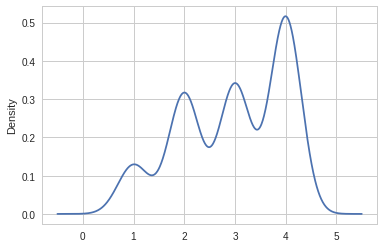

In [11]:
def max_parenteducation(dataframe):
    return(max(dataframe['Medu'], dataframe['Fedu']))

math_data['maxparent_education'] = math_data.apply(lambda row: max_parenteducation(row), axis = 1)
math_data['maxparent_education'].plot(kind = "density")

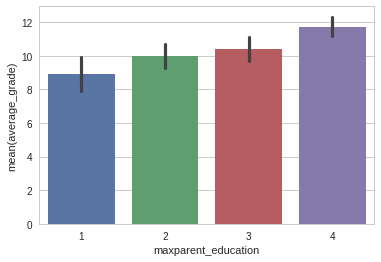

In [12]:
#Lets consider a plot between the student grades to how well educated any of the parent is!
sns.barplot(x = "maxparent_education", y = "average_grade", data = math_data)

#### Inference:  _*There seems to be a clear correlation between how well one of the parents studied to how well a child will perform!*_

Lets first see if there is some pattern of studytime and grades. cliche!!

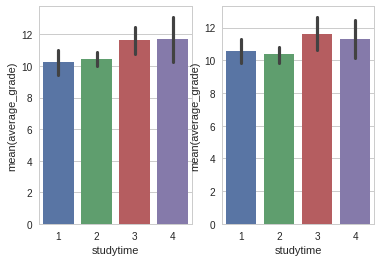

In [13]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "studytime", y = "average_grade", data = math_data, ax=axs[0])
sns.barplot(x = "studytime", y = "average_grade", data = por_data, ax=axs[1])

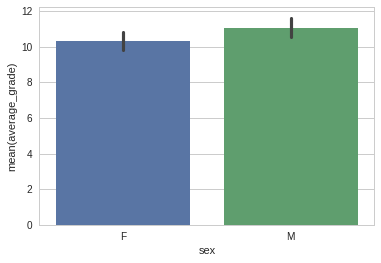

In [14]:
#Girls vs Boys!!
sns.barplot(x = "sex", y = "average_grade",data = math_data)

#### *Inference: Looks like boys win! But is there a family support to girls?*

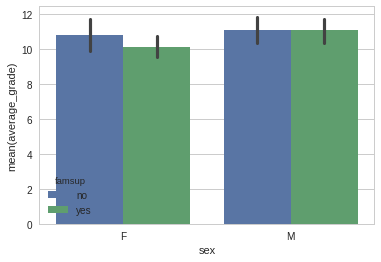

In [15]:
sns.barplot(x = "sex", y = "average_grade", hue = "famsup", data = math_data)

#### Looks like girls want to prove themselves more when there is no family support!

*GIRL POWER!!!*

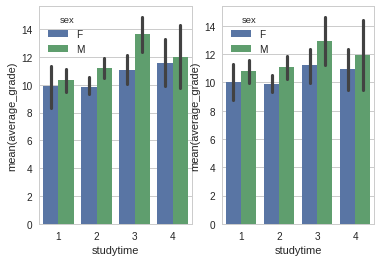

In [16]:
#will there be any difference if we add sex into picture? That is, is there any difference between boys and girls performacne?
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "studytime", y = "average_grade",hue = "sex", data = math_data, ax=axs[0])
sns.barplot(x = "studytime", y = "average_grade",hue = "sex", data = por_data, ax=axs[1])

#### *Inference: A moderate study time of 3 hours gives great grades!*

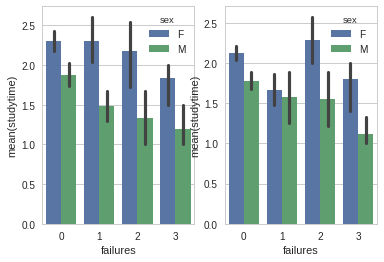

In [17]:
#study time and failures!
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "failures", y = "studytime",hue = "sex", data = math_data, ax=axs[0])
sns.barplot(x = "failures", y = "studytime",hue = "sex", data = por_data, ax=axs[1])

#### Inference: Let's talk about math first! Looks like studetns with 0 failures want to maintain it that way and students with 1 failure, knows what failing means!

#### In addition did you notice girls study more? 

#### Looks like it makes sense with mathematics. But with portuguese, I guess if you don't get it, then you don't get it! Doesn't matter how hard you try! 

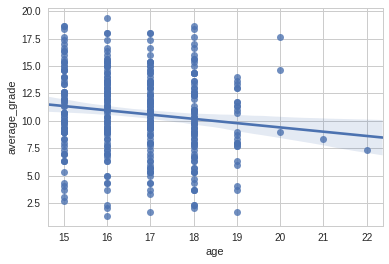

In [18]:
#Will there be any pattern from students age to their grades? 

sns.regplot(x="age", y="average_grade", data=math_data)

## Regarding alchohol consumption!

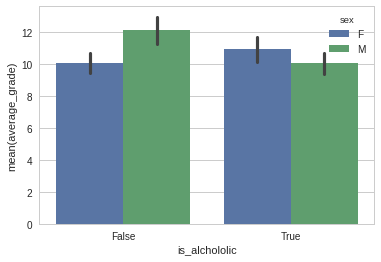

In [19]:
#Let's see the relationship between the alcoholism and average grade. 
sns.barplot(x = "is_alchololic", y = "average_grade", hue = "sex", data = math_data)

#### Inference: There seems to be a pattern that, if females take alcohol then their grades seem to improve while it's reverse with males!

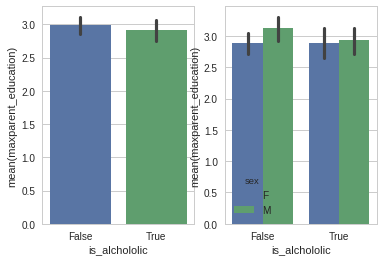

In [20]:
#What if parents were highly educated. How would that effect students alcohol comsumption?
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "is_alchololic", y = "maxparent_education", data = math_data, ax = axs[0])
sns.barplot(x = "is_alchololic", y = "maxparent_education", data = math_data, hue = "sex", ax = axs[1])

#### Inference: There isn't seem to be much difference in the first plot. But if you look at it gender wise, males seem to drink more irrespective of parent education!

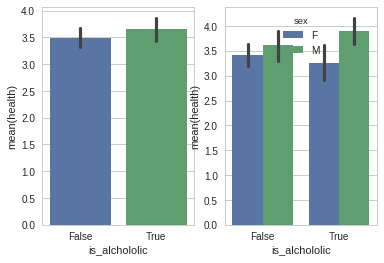

In [21]:
#lets see health and failures. 
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "is_alchololic", y = "health", data = math_data, ax = axs[0])
sns.barplot(x = "is_alchololic", y = "health", data = math_data, hue = "sex", ax = axs[1])

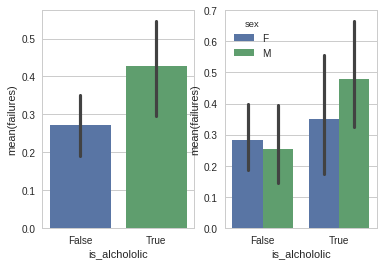

In [22]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "is_alchololic", y = "failures", data = math_data, ax = axs[0])
sns.barplot(x = "is_alchololic", y = "failures", data = math_data, hue = "sex", ax = axs[1])

#### *Inference: No wonder here! If you drink, you are more probable to fail!*

In [23]:
#Now lets divert our attention to the attribute 'romantic'!

math_data.groupby('sex')['romantic'].value_counts().to_frame()

romantic
sex romantic          
F   no             129
    yes             79
M   no             134
    yes             53

#### Stats look pretty amazing! 38% of females are romantic while only 28% of males are romantic!

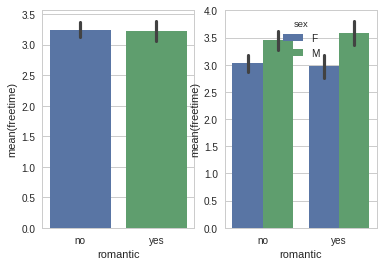

In [24]:
##Is it possible that if a person has more time then he has more time to be romantic or other wise? Let's find out!
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "romantic", y = "freetime", data = math_data, ax = axs[0])
sns.barplot(x = "romantic", y = "freetime", hue = "sex", data = math_data, ax = axs[1])

#### Irrespective of if a person is romantic or not, boys seem to believe they have more free time than females!